# Time-series error example

In [1]:



import os
import sys

import numpy as np

import pyda

sys.path.insert(0, os.path.abspath('../'))

from pyda.tsdata import TSData
from pyda.fsdata import FSData
from pyda.dsp.spectral import psd, logpsd
import numpy

FigSize = (15,10) # global setting for figure size


## Setup matplotlib

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

## Generate a sinewave

In [3]:
nsecs = 1e2
s1 = TSData.sinewave(fs=10.0, nsecs=nsecs, A0=2, f0=1.2, phi=0, name='S1', yunits='V') + \
     TSData.randn(nsecs=nsecs, fs=10.0, yunits='V', name="n1")
s1.dyaxis=0.2
s1.dxaxis=0.2
s1.marker = 'o'

s2 = TSData.sinewave(fs=10.0, nsecs=nsecs, A0=2, f0=1.2, phi=0, name='S2', yunits='V') + \
     TSData.randn(nsecs=nsecs, fs=10.0, yunits='V', name="n2")
s2.dyaxis=0.3
s2.dxaxis=0.3
s2.marker = 'o'

print(s1)


-------- TSData ---------
  name: (S1 + n1)
  uuid: e94a9c5a-1b40-4d38-b246-36a666dad930
    fs: 10.0
 nsecs: 99.9
 xaxis: Time=(1000,)[s]
 yaxis: Amplitude=(1000,)[V]
    dx: Time=(1,)[s]
    dy: Amplitude=(1,)[V]

-----------------------------


In [4]:

sd = s1/s2
print(sd)

-------- TSData ---------
  name: (S1 + n1)/(S2 + n2)
  uuid: e94a9c5a-1b40-4d38-b246-36a666dad930
    fs: 10.0
 nsecs: 99.9
 xaxis: Time=(1000,)[s]
 yaxis: Amplitude=(1000,)[]
    dx: Time=(1,)[s]
    dy: Amplitude=(1000,)[]

-----------------------------


[<Figure size 1080x720 with 0 Axes>,
 [<AxesSubplot:xlabel='Time $\\left[\\,{\\mathrm{s}} \\right]$', ylabel='Amplitude $\\left[\\,{\\mathrm{V}} \\right]$'>],
 [<ErrorbarContainer object of 3 artists>,
  <ErrorbarContainer object of 3 artists>,
  <ErrorbarContainer object of 3 artists>]]

<Figure size 1080x720 with 0 Axes>

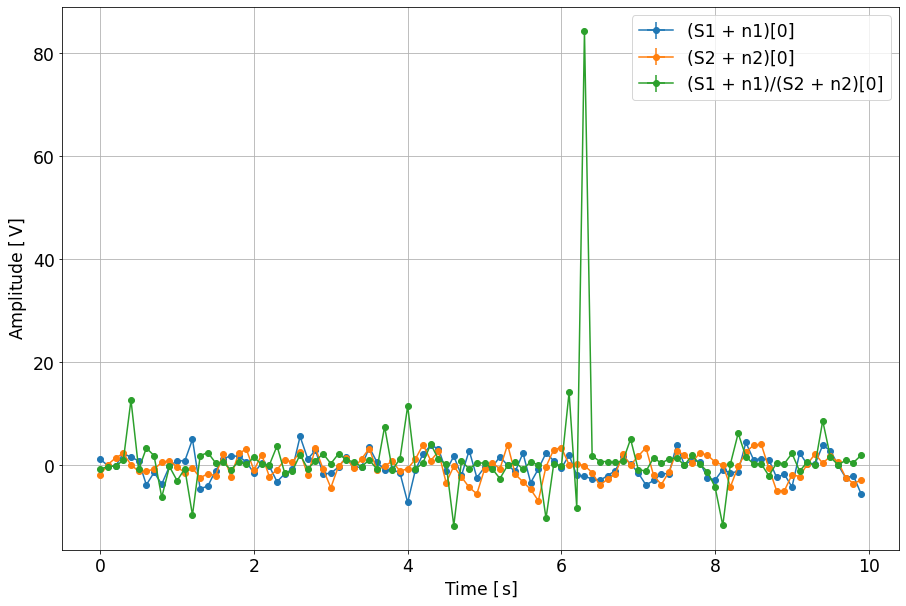

In [5]:
s1s = s1.split_by_time(times=[0, 10])
s2s = s2.split_by_time(times=[0, 10])
sds = sd.split_by_time(times=[0, 10])

s1s.plot(s2s, sds, ShowErrors=True)


In [6]:
sp3 = s1**3

sp3.plot(ShowErrors=True)

[<Figure size 1080x720 with 0 Axes>,
 [<AxesSubplot:xlabel='Time $\\left[\\,{\\mathrm{s}} \\right]$', ylabel='Amplitude $\\left[\\,{\\mathrm{V}}^{3} \\right]$'>],
 [<ErrorbarContainer object of 3 artists>]]

<Figure size 1080x720 with 0 Axes>

[<Figure size 1080x720 with 0 Axes>,
 [<AxesSubplot:xlabel='Time $\\left[\\,{\\mathrm{s}} \\right]$', ylabel='Amplitude $\\left[\\,{\\mathrm{V}} \\right]$'>],
 [<ErrorbarContainer object of 3 artists>]]

<Figure size 1080x720 with 0 Axes>

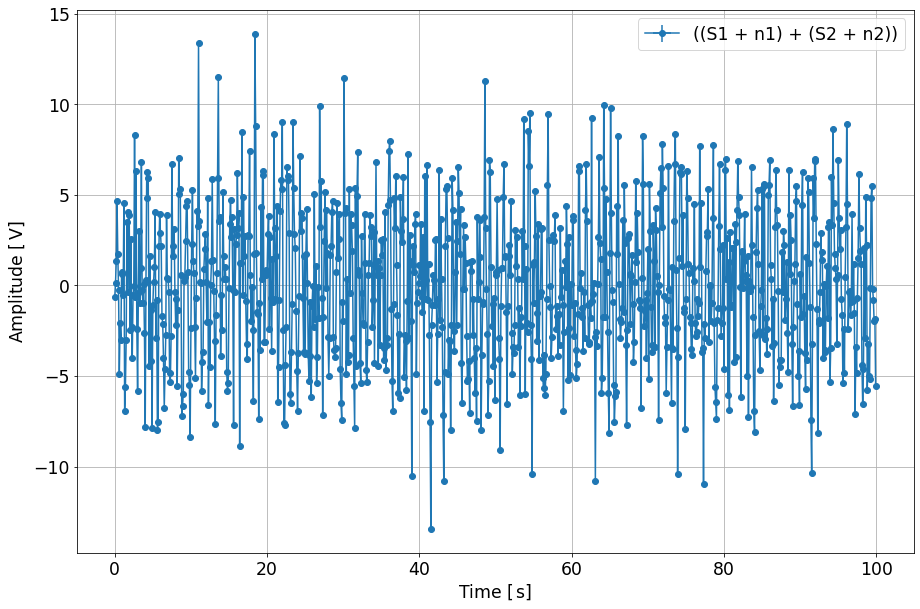

In [7]:
spp = s1 + s2

spp.plot(ShowErrors=True)

In [8]:
stt = s1 * s2

stt.plot(ShowErrors=True)

[<Figure size 1080x720 with 0 Axes>,
 [<AxesSubplot:xlabel='Time $\\left[\\,{\\mathrm{s}} \\right]$', ylabel='Amplitude $\\left[\\,{\\mathrm{V}}^{2} \\right]$'>],
 [<ErrorbarContainer object of 3 artists>]]

<Figure size 1080x720 with 0 Axes>

## Plot time-series and configure markers

[0.]


<Figure size 1080x720 with 0 Axes>

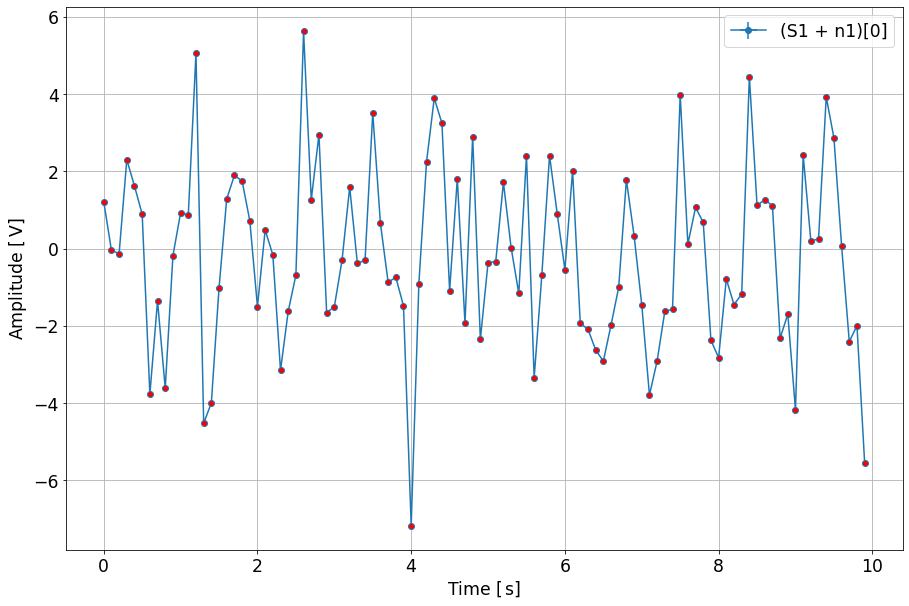

In [9]:


h = s1s.plot(ShowErrors=True)
print(s1.yaxis.ddata)

ax = h[1]
l = ax[0].get_lines()
l[0].set_markerfacecolor('r')

In [10]:
s1s.loglog(ShowErrors=True)


[<Figure size 1080x720 with 0 Axes>,
 [<AxesSubplot:xlabel='Time $\\left[\\,{\\mathrm{s}} \\right]$', ylabel='Amplitude $\\left[\\,{\\mathrm{V}} \\right]$'>],
 [<ErrorbarContainer object of 3 artists>]]

<Figure size 1080x720 with 0 Axes>

In [11]:

S = logpsd(s1)
S2 = logpsd(s1, order=3)
print(S)
S.loglog(S2, ShowErrors=True)

* computing lpsd of (S1 + n1) ...
computing frequency 0 of 77: 0.01 Hz
* computing lpsd of (S1 + n1) ...
computing frequency 0 of 77: 0.01 Hz
-------- FSData ---------
  name: PSD((S1 + n1))
  uuid: b23fae7d-9f9d-493c-b730-8d7aff09e1f5
     x: Frequency=(77,)[Hz]
     y: Amplitude=(77,)[V^(2)][Hz^(-1)]
    dx: Frequency=(1,)[Hz]
    dy: Amplitude=(77,)[V^(2)][Hz^(-1)]

-----------------------------


/Users/hewitson/.conda/envs/pyda39/lib/python3.9/site-packages/lpsd/_helpers.py:459: RuntimeWarning: invalid value encountered in sqrt
  devxx[i] = np.sqrt(B2ns / fs ** 2 / S2 ** 2)
/Users/hewitson/.conda/envs/pyda39/lib/python3.9/site-packages/lpsd/_helpers.py:460: RuntimeWarning: invalid value encountered in sqrt
  dev[i] = np.sqrt(B2ns / S12 ** 2)


[<Figure size 1080x720 with 0 Axes>,
 [<AxesSubplot:xlabel='Frequency $\\left[\\,{\\mathrm{Hz}} \\right]$', ylabel='Amplitude $\\left[\\frac{\\,{\\mathrm{V}}^{2}}{\\,{\\mathrm{Hz}}} \\right]$'>],
 [<ErrorbarContainer object of 3 artists>,
  <ErrorbarContainer object of 3 artists>]]

<Figure size 1080x720 with 0 Axes>

[<Figure size 1080x720 with 0 Axes>,
 [<AxesSubplot:xlabel='Frequency $\\left[\\,{\\mathrm{Hz}} \\right]$', ylabel='Amplitude $\\left[\\frac{\\,{\\mathrm{V}}^{2}}{\\,{\\mathrm{Hz}}} \\right]$'>],
 [None]]

<Figure size 1080x720 with 0 Axes>

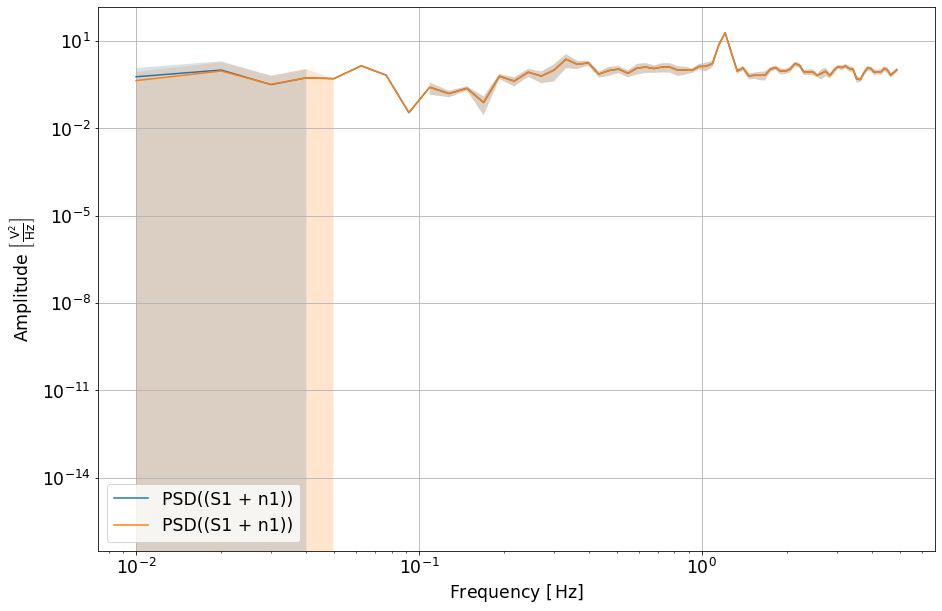

<Figure size 1080x720 with 0 Axes>

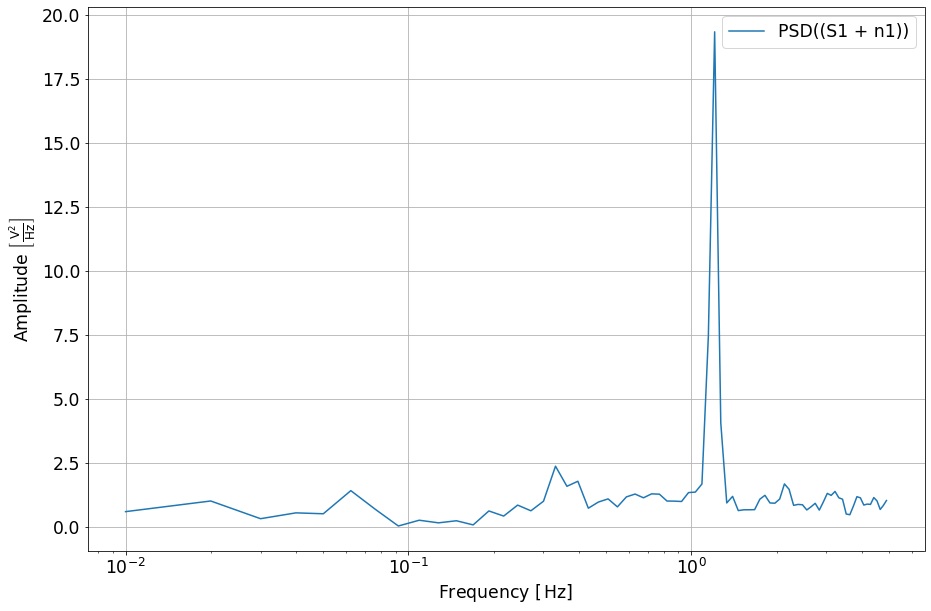

<Figure size 1080x720 with 0 Axes>

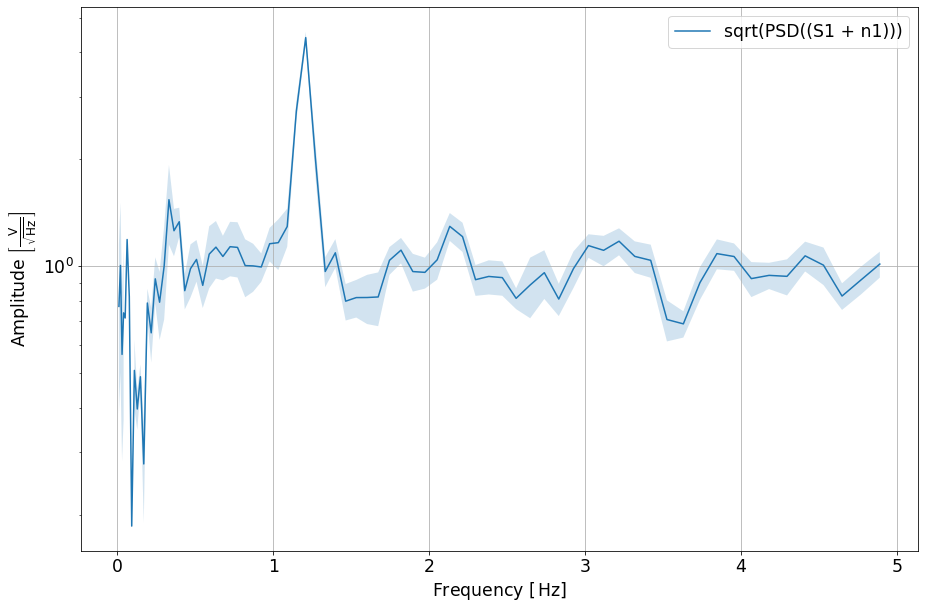

<Figure size 1080x720 with 0 Axes>

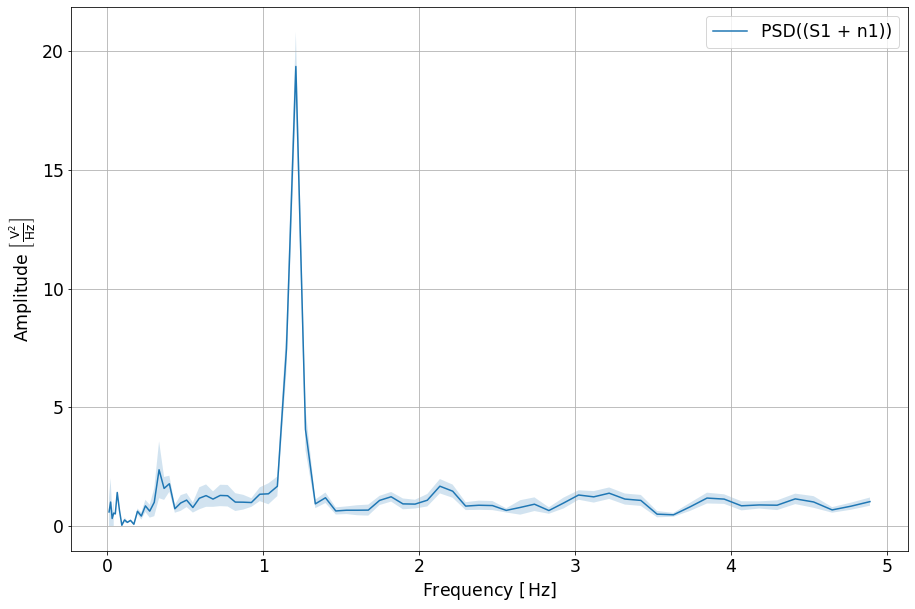

In [12]:
S.loglog(S2, ShowErrors=True, ErrorType="area")
S.semilogx()
S.sqrt().semilogy(ShowErrors=True, ErrorType="area")
S.plot(ShowErrors=True, ErrorType="area")

In [13]:
S.color = 'k'
S.sqrt().loglog(S2.sqrt(), ShowErrors=True, ErrorType="area")


[<Figure size 1080x720 with 0 Axes>,
 [<AxesSubplot:xlabel='Frequency $\\left[\\,{\\mathrm{Hz}} \\right]$', ylabel='Amplitude $\\left[\\frac{\\,{\\mathrm{V}}}{\\,{\\sqrt{\\mathrm{Hz}}}} \\right]$'>],
 [None, None]]

<Figure size 1080x720 with 0 Axes>

In [14]:
from mpmath import mp


In [15]:
import numpy
a = numpy.nan

a = complex(1,2)
print(a)


(1+2j)
